Exercises of Matplotlib Visualization

**Sales data Visualization**

In [214]:
from matplotlib import pyplot as plt
import pandas as pd

In [215]:
salesData=pd.read_csv("salesData.csv")
salesData.head()


,Date,Category,Value,Product,Sales,Region
0,2023-01-01,A,28.0,Product1,754.0,East
1,2023-01-02,B,39.0,Product3,110.0,North
2,2023-01-03,C,32.0,Product2,398.0,East
3,2023-01-04,B,8.0,Product1,522.0,East
4,2023-01-05,B,26.0,Product3,869.0,North


In [216]:
#Group the data based on product category

#Plot total sales by products

totalSalesByProduct=salesData.groupby("Product")["Sales"].sum()
totalSalesByProduct

Product
Product1    8623.0
Product2    7374.0
Product3    9631.0
Name: Sales, dtype: float64

<Axes: xlabel='Product'>

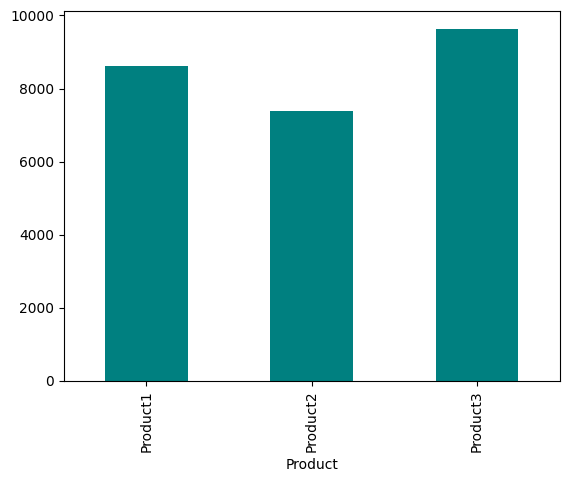

In [217]:
totalSalesByProduct.plot(kind="bar", color="teal")

**Chocolate Sales visualization**

In [218]:
chocolateDataset=pd.read_csv("datasets/Chocolate Sales.csv")
chocolateDataset.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [219]:
print(chocolateDataset.dtypes)
chocolateDataset.isnull().sum()

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object


Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [220]:
import datetime

In [221]:
#Auxiliar functions

def convertsStringToFloat(string):
    """Converts from string to float"""
    
    try:
        number=float(string)

    except ValueError as val:
        print(f"{string} is not a number!")
        
    except Exception as ex:
        print(ex)

    else:
        return number



def convertsStringToInteger(string):
    """Converts from string to integer"""

    try:
        if string !=None and string.isnumeric():
            number=int(string)

    except ValueError as val:
        print(f"{string} is not a number!")
        
    except Exception as ex:
        print(ex)

    else:
        return number



def convertsStringToDate(stringDate,formatDate):
    """"Converts a string into datetime format
    Args:
        stringDate: Date in string format
        formatDate: The format of the date
    
    Returns:
        Datetime object
    """

    try:
        if stringDate!=None and formatDate!=None:
            dateTime=datetime.datetime.strptime(stringDate,formatDate)

    except ValueError as ex:
        print(ex)
    except TypeError as ex:
        print(ex)
    
    else:
        return dateTime



def removeSymbols(string, symbols):
    """Remove the unwanted symbols in a String"""
    
    try:
        simpleText=""
        for char in string:
            if char not in (symbols):
                simpleText+=char

    except Exception as ex:
        print(ex)

    else:
        return simpleText


#dateString="10/12/2023"
#format2="%d/%m/%Y"
#date=convertsStringToDate(dateString,format2)
#print(date.year)

#print(convertsStringToFloat(chocolateDataset["Amount"][0]))
#print(type(chocolateDataset["Amount"][0]))
#money=chocolateDataset["Amount"][0]
#print(money)

In [222]:
# 1. Total amount of sales of each country 

#Remove the dollar sign and the comma in the Amount column ($5,320.00)
symbols="$,"
chocolateDataset["Amount"]=chocolateDataset["Amount"].apply(removeSymbols,args=[symbols])
chocolateDataset["Amount"].head()

0     5320.00
1     7896.00
2     4501.00
3    12726.00
4    13685.00
Name: Amount, dtype: object

In [223]:
# Converts the amount column into float 
chocolateDataset["Amount"]=chocolateDataset["Amount"].apply(convertsStringToFloat)
print(type(chocolateDataset["Amount"][0]))
chocolateDataset["Amount"].head()

<class 'numpy.float64'>


0     5320.0
1     7896.0
2     4501.0
3    12726.0
4    13685.0
Name: Amount, dtype: float64

In [224]:
#Calculate the total amount of each country
listCountries=set(chocolateDataset["Country"])
print(listCountries)
totalAmountByCountry=chocolateDataset.groupby("Country")["Amount"].sum()
totalAmountByCountry=totalAmountByCountry.sort_values()

{'UK', 'New Zealand', 'India', 'Australia', 'USA', 'Canada'}


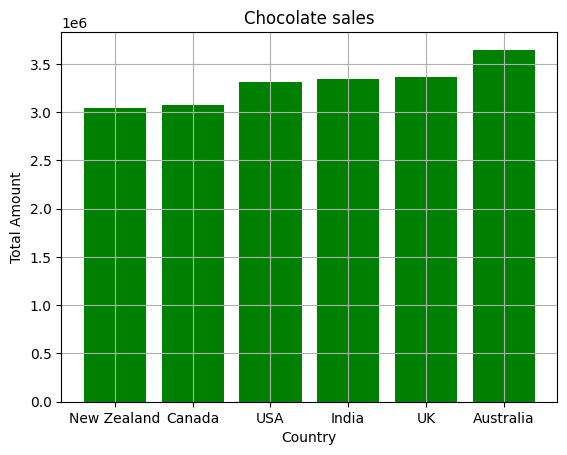

In [225]:
# Create the bar and pie charts

# Bar plot
plt.bar(totalAmountByCountry.index, totalAmountByCountry.values, color="green")
plt.xlabel("Country")
plt.ylabel("Total Amount")
plt.title("Chocolate sales")
plt.grid()
plt.show()


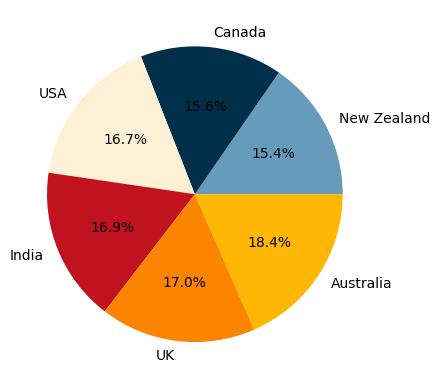

In [226]:
# Pie chart
countryLabels=totalAmountByCountry.index
percentageFormat="%1.1f%%"
colors=["#669bbc","#003049","#fdf0d5","#c1121f","#fb8500","#ffb703"]
plt.pie(totalAmountByCountry.values, labels=countryLabels, autopct=percentageFormat, colors=colors)
plt.show()

In [227]:
# Sort the data frame
#df=chocolateDataset.sort_values(by="Boxes Shipped")
#df.head()


In [228]:
# 2. Total quantity of boxes shipped of each product
listProducts=set(chocolateDataset["Product"])
print(listProducts)
print(len(listProducts))

totalQuantityOfBoxes=chocolateDataset.groupby("Product")["Boxes Shipped"].sum()
totalQuantityOfBoxes=totalQuantityOfBoxes.sort_values()
totalQuantityOfBoxes

{'70% Dark Bites', '50% Dark Bites', 'Milk Bars', 'Raspberry Choco', 'Orange Choco', '85% Dark Bars', 'Smooth Sliky Salty', 'Caramel Stuffed Bars', 'Eclairs', 'Organic Choco Syrup', 'Peanut Butter Cubes', 'Almond Choco', "Baker's Choco Chips", 'Spicy Special Slims', 'Manuka Honey Choco', 'Mint Chip Choco', 'After Nines', '99% Dark & Pure', 'White Choc', 'Fruit & Nut Bars', 'Drinking Coco', 'Choco Coated Almonds'}
22


Product
Choco Coated Almonds    19677
Almond Choco            20558
Baker's Choco Chips     21448
Raspberry Choco         21672
Organic Choco Syrup     23602
Orange Choco            23607
Fruit & Nut Bars        23632
Manuka Honey Choco      23736
85% Dark Bars           23828
70% Dark Bites          24524
99% Dark & Pure         24818
Mint Chip Choco         25149
After Nines             25156
White Choc              25158
Peanut Butter Cubes     25339
Milk Bars               25436
Drinking Coco           26402
Caramel Stuffed Bars    26576
Spicy Special Slims     26662
Eclairs                 26678
Smooth Sliky Salty      26969
50% Dark Bites          29810
Name: Boxes Shipped, dtype: int64

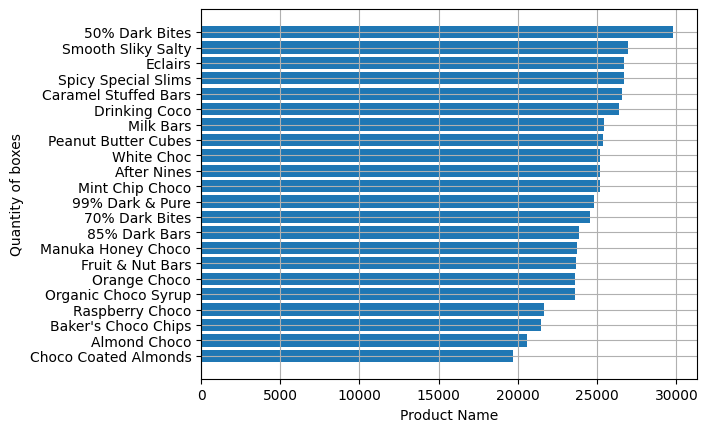

In [229]:
# Create the barh (bar chart horizontal) 

plt.barh(totalQuantityOfBoxes.index, totalQuantityOfBoxes.values)
plt.xlabel("Product Name")
plt.ylabel("Quantity of boxes")
plt.grid()

**Bar chart horizontal**

Lida bem com muitas categorias;

Os nomes dos produtos ficam legíveis;

Comparação de quantidades é clara;

Escala bem para 20, 30 ou até mais categorias.



In [230]:
# 3. A histogram of Years X Total Amount 

# x axis = Dates
# y axis = Amount of sales

# Converts String to Date
format="%d/%m/%Y"
chocolateDataset["Date"]=chocolateDataset["Date"].apply(convertsStringToDate,args=[format])
#chocolateDataset["Date"]=pd.to_datetime(chocolateDataset["Date"])

print(type(chocolateDataset["Date"][0]))
print(chocolateDataset["Date"][0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2022-01-04 00:00:00


In [231]:
#listYears=set(chocolateDataset["Date"])
#listYears.add()
#listYears


listDates=chocolateDataset["Date"]


def listYears(listDates):
    """Returns a list of years finded in the column Date"""

    try:
        listYears=[]
        for date in listDates:
            year=date.year
            if year not in listYears:
                listYears.append(year)
    
    except ValueError as val:
        print(f"{listDates} is not a valid value")
    
    except Exception as ex:
        print(ex)
    
    else:
        return listYears



print(listYears(listDates))



[2022, 2023, 2024]


In [ ]:
#linhaCondicao=chocolateDataset[chocolateDataset["Product"]=="Milk Bars"]

groupByYearTotalAmount=chocolateDataset.groupby(chocolateDataset["Date"].dt.year)["Amount"].sum() # The column needs to be a datetime type to use .dt
groupByYearTotalAmount

#for linha in chocolateDataset:
#    print(linha)

Date
2022    6183625.00
2023    6643377.96
2024    6964568.90
Name: Amount, dtype: float64

In [ ]:
#Create a bar char to show the total amount of each year

plt.bar(groupByYearTotalAmount.index, groupByYearTotalAmount.values,color="blue")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.grid()
plt.show()

NameError: name 'groupByYearTotalAmount' is not defined

In [ ]:
#Mostrar a evolucao das vendas no ano de 2024 num histograma, agrupando pelos meses do ano

groupByYear2024=chocolateDataset.groupby(chocolateDataset["Date"].dt.year==2024 & chocolateDataset["Date"].dt.month)
groupByYear2024



Date
2024-08-24    49072.98
2024-08-25    44613.09
2024-08-26    19523.06
2024-08-30    26634.86
2024-08-31     6170.80
Name: Amount, dtype: float64

In [236]:
#histogramDatesSales=histogramDatesSales["Date"]
#pagamentoPorAno=chocolateDataset.groupby(chocolateDataset["Date"].dt.year)["Amount"].sum()
#pagamentoPorAno

#pagamentoPorAno=chocolateDataset

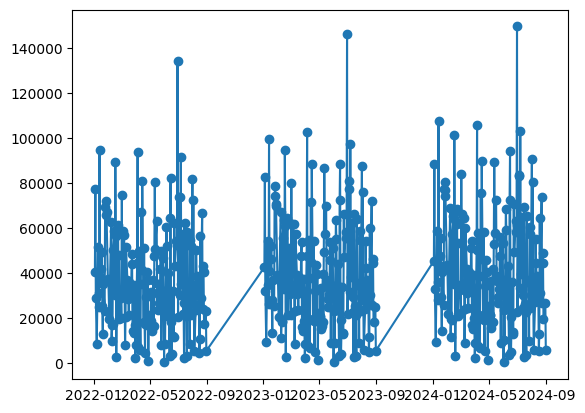

In [237]:


plt.plot(histogramDatesSales.index, histogramDatesSales.values, marker="o")